<a href="https://colab.research.google.com/github/SelimSavas/ForkliftAndPeopleDetectionWithYolov5/blob/main/CityScapesCOCOMaskRCNNvProVSon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CityScapes Dataset - Instance Segmentation - COCO Format - Detectron 2 - Mask R-CNN

## 1. Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!git clone https://github.com/cemsaz/city-scapes-script.git # City Scapes Dataseti indirmek için indirme reposunu çekiyoruz.

Cloning into 'city-scapes-script'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), 463.15 KiB | 10.29 MiB/s, done.


In [2]:
!git clone "https://github.com/TillBeemelmanns/cityscapes-to-coco-conversion" # City Scapes Datasetini Coco formatına çevirmek için gerekli dosya dizinini çekiyoruz.

Cloning into 'cityscapes-to-coco-conversion'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 28 (delta 5), reused 23 (delta 4), pack-reused 0
Unpacking objects: 100% (28/28), 5.58 MiB | 5.67 MiB/s, done.


In [3]:
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=SelimSavas&password=456789123aS.&submit=Login' https://www.cityscapes-dataset.com/login/

--2023-04-10 07:26:37--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2023-04-10 07:26:39--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [   <=>              ]  47.35K   112KB/s    in 0.4s    

2023-04-10 07:26:39 (112 KB/s) - ‘index.html’ saved [48483]



In [4]:
# gtFine_trainvaltest (1) datasetini indirmek için cookies.txt'ye başvuruyoruz.
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=1

--2023-04-10 07:27:01--  https://www.cityscapes-dataset.com/file-handling/?packageID=1
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252567705 (241M) [application/octet-stream]
Saving to: ‘gtFine_trainvaltest.zip’

gtFine_trainvaltest 100%[===================>] 240.87M  13.0MB/s    in 19s     

2023-04-10 07:27:21 (12.5 MB/s) - ‘gtFine_trainvaltest.zip’ saved [252567705/252567705]



In [7]:
# gtFine_trainvaltest (3) datasetini indirmek için cookies.txt'ye başvuruyoruz.
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3

--2023-04-10 07:29:17--  https://www.cityscapes-dataset.com/file-handling/?packageID=3
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11592327197 (11G) [application/octet-stream]
Saving to: ‘leftImg8bit_trainvaltest.zip’

leftImg8bit_trainva 100%[===================>]  10.80G  13.4MB/s    in 21m 6s  

2023-04-10 07:50:24 (8.73 MB/s) - ‘leftImg8bit_trainvaltest.zip’ saved [11592327197/11592327197]



In [8]:
# Cityscapes-to-coco-conversion Datasetimizin data klasörünü oluşturuyoruz.
%mkdir cityscapes-to-coco-conversion/data
%mkdir cityscapes-to-coco-conversion/data/cityscapes
%mkdir cityscapes-to-coco-conversion/data/cityscapes/annotations

In [9]:
!unzip /content/gtFine_trainvaltest.zip -d /content/cityscapes-to-coco-conversion/data/cityscapes

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/cityscapes-to-coco-conversion/data/cityscapes/gtFine/test/berlin/berlin_000117_000019_gtFine_color.png  
  inflating: /content/cityscapes-to-coco-conversion/data/cityscapes/gtFine/test/berlin/berlin_000114_000019_gtFine_color.png  
  inflating: /content/cityscapes-to-coco-conversion/data/cityscapes/gtFine/test/berlin/berlin_000434_000019_gtFine_labelIds.png  
  inflating: /content/cityscapes-to-coco-conversion/data/cityscapes/gtFine/test/berlin/berlin_000420_000019_gtFine_color.png  
  inflating: /content/cityscapes-to-coco-conversion/data/cityscapes/gtFine/test/berlin/berlin_000483_000019_gtFine_instanceIds.png  
  inflating: /content/cityscapes-to-coco-conversion/data/cityscapes/gtFine/test/berlin/berlin_000420_000019_gtFine_instanceIds.png  
  inflating: /content/cityscapes-to-coco-conversion/data/cityscapes/gtFine/test/berlin/berlin_000254_000019_gtFine_color.png  
  inflating: /content/cityscapes-to-coco-conversi

In [10]:
!unzip -o /content/leftImg8bit_trainvaltest.zip -d /content/cityscapes-to-coco-conversion/data/cityscapes 

Görüntülenen çıkış son 5000 satıra kısaltıldı.
 extracting: /content/cityscapes-to-coco-conversion/data/cityscapes/leftImg8bit/train/jena/jena_000074_000019_leftImg8bit.png  
 extracting: /content/cityscapes-to-coco-conversion/data/cityscapes/leftImg8bit/train/jena/jena_000040_000019_leftImg8bit.png  
 extracting: /content/cityscapes-to-coco-conversion/data/cityscapes/leftImg8bit/train/jena/jena_000020_000019_leftImg8bit.png  
 extracting: /content/cityscapes-to-coco-conversion/data/cityscapes/leftImg8bit/train/jena/jena_000030_000019_leftImg8bit.png  
 extracting: /content/cityscapes-to-coco-conversion/data/cityscapes/leftImg8bit/train/jena/jena_000005_000019_leftImg8bit.png  
 extracting: /content/cityscapes-to-coco-conversion/data/cityscapes/leftImg8bit/train/jena/jena_000059_000019_leftImg8bit.png  
 extracting: /content/cityscapes-to-coco-conversion/data/cityscapes/leftImg8bit/train/jena/jena_000100_000019_leftImg8bit.png  
 extracting: /content/cityscapes-to-coco-conversion/data/

## 2. Installation

In [11]:
!pip install -r /content/cityscapes-to-coco-conversion/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 3. Run

In [12]:
%cd /content/cityscapes-to-coco-conversion/
%ls

/content/cityscapes-to-coco-conversion
assets/  data/  inspect_coco.py  main.py  README.md  requirements.txt  utils/


In [13]:
!python main.py --dataset cityscapes --datadir data/cityscapes --outdir data/cityscapes/annotations

Starting leftImg8bit/train
Processed 0 images, 0 annotations
Processed 50 images, 943 annotations
Processed 100 images, 1894 annotations
Processed 150 images, 2784 annotations
Processed 200 images, 3758 annotations
Processed 250 images, 4672 annotations
Processed 300 images, 5582 annotations
Processed 350 images, 6179 annotations
Processed 400 images, 6697 annotations
Processed 450 images, 7639 annotations
Processed 500 images, 9221 annotations
Processed 550 images, 10958 annotations
Processed 600 images, 12609 annotations
Processed 650 images, 14084 annotations
Processed 700 images, 15417 annotations
Processed 750 images, 16151 annotations
Processed 800 images, 16927 annotations
Processed 850 images, 17577 annotations
Processed 900 images, 18285 annotations
Processed 950 images, 18992 annotations
Processed 1000 images, 19750 annotations
Processed 1050 images, 20312 annotations
Processed 1100 images, 20892 annotations
Processed 1150 images, 21416 annotations
Processed 1200 images, 2222

In [14]:
!python inspect_coco.py --coco_dir data/cityscapes

data/cityscapes/annotations/instancesonly_filtered_gtFine_train.json
loading annotations into memory...
Done (t=4.91s)
creating index...
index created!
Image Count: 2965
Class Count: 9
  0. BG                                                
  1. person                                            
  2. car                                               
  3. bicycle                                           
  4. rider                                             
  5. motorcycle                                        
  6. bus                                               
  7. truck                                             
  8. train                                             
Figure(1400x500)
Figure(1400x500)
Figure(1400x500)
Figure(1400x500)
Figure(1400x500)
Figure(1600x800)
Figure(1600x800)
Figure(1600x800)
Figure(1600x800)
Figure(1600x800)


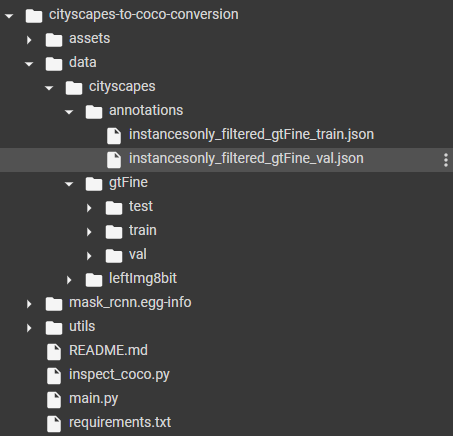

## Detectron 2 - Mask RCNN

In [15]:
%cd /content/

/content


In [16]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp39-cp39-linux_x86_64.whl size=44089 sha256=e45f17f640a1b3d784f28729f67faae219406de2fe856faca2213b9dbee40682
  Stored in directory: /root/.cache/pip/wheels/68/be/8f/b6c454cd264e0b349b47f8ee00755511f277618af9e5dae20d
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.6.8 requires PyYAML>=5.4.1, but you have pyyaml 5.1 which is incompatible.
dask 2022.12.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.

In [17]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


In [18]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [19]:
# if your dataset is in COCO format, this cell can be replaced by the following three lines:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/cityscapes-to-coco-conversion/data/cityscapes/annotations/instancesonly_filtered_gtFine_train.json", "/content/cityscapes-to-coco-conversion/data/cityscapes")
register_coco_instances("my_dataset_val", {}, "/content/cityscapes-to-coco-conversion/data/cityscapes/annotations/instancesonly_filtered_gtFine_val.json", "/content/cityscapes-to-coco-conversion/data/cityscapes")


In [20]:
from detectron2.data import MetadataCatalog

MetadataCatalog.get("my_dataset_train").set(thing_classes=['person', 'car', 'bicycle', 'rider', 'motorcycle', 'bus', 'truck', 'train'])
MetadataCatalog.get("my_dataset_val").set(thing_classes=['person', 'car', 'bicycle', 'rider', 'motorcycle', 'bus', 'truck', 'train'])

namespace(name='my_dataset_val',
          json_file='/content/cityscapes-to-coco-conversion/data/cityscapes/annotations/instancesonly_filtered_gtFine_val.json',
          image_root='/content/cityscapes-to-coco-conversion/data/cityscapes',
          evaluator_type='coco',
          thing_classes=['person',
                         'car',
                         'bicycle',
                         'rider',
                         'motorcycle',
                         'bus',
                         'truck',
                         'train'])

In [24]:
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(
    model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
)
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 2965
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 1024
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8

In [25]:
with open("output.yaml", "w") as f:
  f.write(cfg.dump())

In [26]:
from detectron2.engine import DefaultTrainer

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[04/10 08:11:26 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[04/10 08:11:33 d2.engine.train_loop]: Starting training from iteration 0
[04/10 08:12:07 d2.utils.events]:  eta: 1:18:59  iter: 19  total_loss: 3.512  loss_cls: 1.945  loss_box_reg: 0.5474  loss_mask: 0.6919  loss_rpn_cls: 0.07196  loss_rpn_loc: 0.2789    time: 1.6401  last_time: 1.8935  data_time: 0.0970  last_data_time: 0.0396   lr: 1.9981e-05  max_mem: 6328M
[04/10 08:12:40 d2.utils.events]:  eta: 1:18:50  iter: 39  total_loss: 3.074  loss_cls: 1.62  loss_box_reg: 0.5188  loss_mask: 0.6808  loss_rpn_cls: 0.07457  loss_rpn_loc: 0.2047    time: 1.6584  last_time: 1.5986  data_time: 0.0428  last_data_time: 0.0492   lr: 3.9961e-05  max_mem: 6328M
[04/10 08:13:13 d2.utils.events]:  eta: 1:17:55  iter: 59  total_loss: 2.543  loss_cls: 0.9655  loss_box_reg: 0.5547  loss_mask: 0.6604  loss_rpn_cls: 0.06899  loss_rpn_loc: 0.2324    time: 1.6488  last_time: 1.5001  data_time: 0.0365  last_data_time: 0.0182   lr: 5.9941e-05  max_mem: 6329M
[04/10 08:13:45 d2.utils.events]:  eta: 1:17:11  iter

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

Launching TensorBoard...

In [42]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:

im = cv2.imread("/content/cityscapes-to-coco-conversion/data/cityscapes/leftImg8bit/test/berlin/berlin_000029_000019_leftImg8bit.png")

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set a custom testing threshold
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[04/10 10:29:33 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [43]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 4,
        0, 0, 0], device='cuda:0')
Boxes(tensor([[1780.5154,  409.2181, 2048.0000,  597.3137],
        [  81.9015,  440.9168,  222.1898,  525.9279],
        [ 288.3856,  411.7237,  347.1404,  579.1141],
        [ 383.2162,  405.9473,  460.6564,  588.8190],
        [ 450.6953,  401.7255,  514.5443,  589.8522],
        [ 247.0467,  422.0976,  300.8119,  577.0245],
        [ 977.4886,  404.9872, 1043.2136,  558.9351],
        [1393.7811,  426.1353, 1439.7074,  545.3346],
        [ 334.2202,  417.4119,  390.3078,  584.7979],
        [1357.7318,  409.9409, 1391.3391,  486.2702],
        [  49.7446,  431.1854,  148.7659,  510.9632],
        [ 499.8020,  405.4335,  578.1139,  579.8375],
        [1273.3977,  420.0026, 1301.0387,  497.5961],
        [1304.7679,  412.4279, 1331.3889,  491.8882],
        [1158.3660,  409.1588, 1188.6842,  496.2139],
        [ 738.3454,  418.9364,  793.1787,  522.9517],
        [   3.4

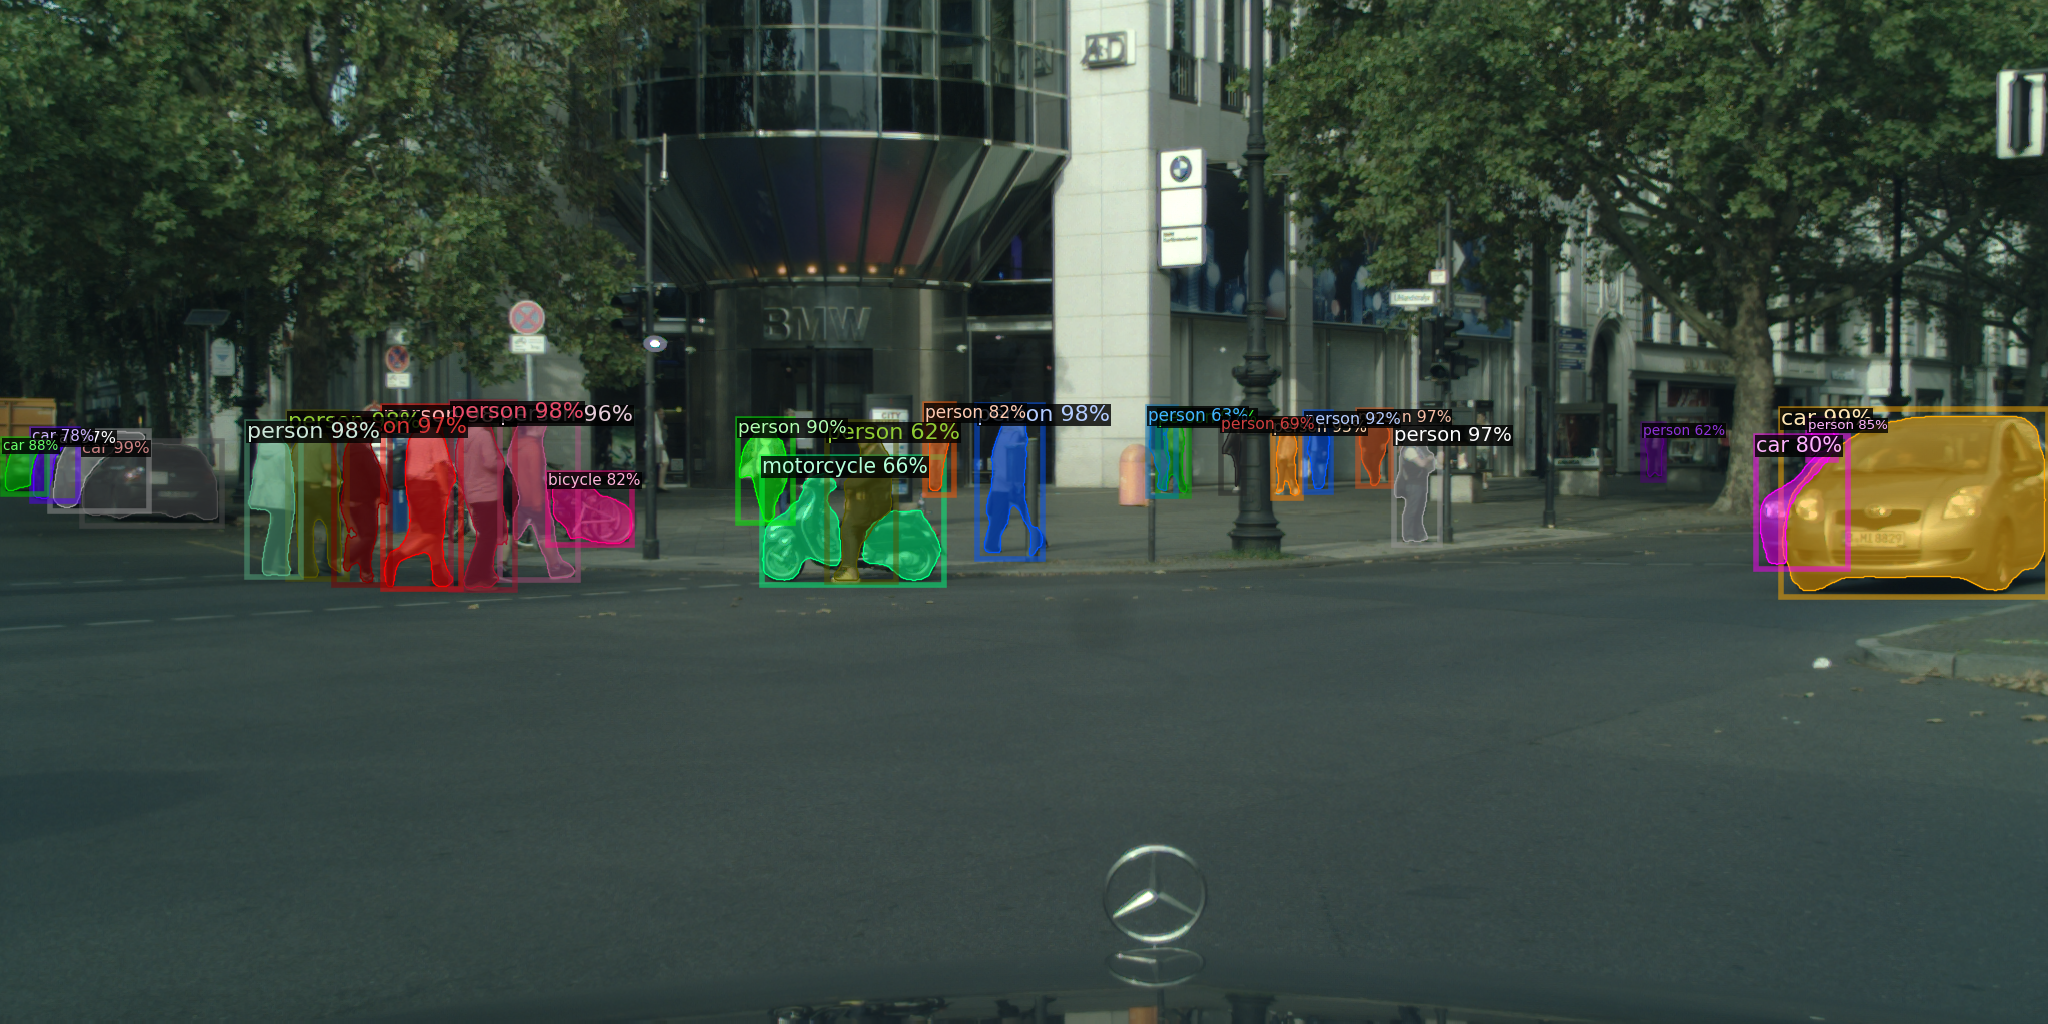

In [44]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [35]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[04/10 10:23:57 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
[04/10 10:23:59 d2.data.datasets.coco]: Loaded 500 images in COCO format from /content/cityscapes-to-coco-conversion/data/cityscapes/annotations/instancesonly_filtered_gtFine_val.json
[04/10 10:23:59 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[04/10 10:23:59 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[04/10 10:23:59 d2.data.common]: Serializing 500 elements to byte tensors and concatenating them all ...
[04/10 10:23:59 d2.data.common]: Serialized dataset takes 18.45 MiB
[04/10 10:23:59 d2.evaluation.evaluator]: Start inference on 500 batches


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[04/10 10:24:05 d2.evaluation.evaluator]: Inference done 11/500. Dataloading: 0.0039 s/iter. Inference: 0.1348 s/iter. Eval: 0.1962 s/iter. Total: 0.3348 s/iter. ETA=0:02:43
[04/10 10:24:10 d2.evaluation.evaluator]: Inference done 31/500. Dataloading: 0.0048 s/iter. Inference: 0.1223 s/iter. Eval: 0.1526 s/iter. Total: 0.2799 s/iter. ETA=0:02:11
[04/10 10:24:16 d2.evaluation.evaluator]: Inference done 47/500. Dataloading: 0.0046 s/iter. Inference: 0.1230 s/iter. Eval: 0.1685 s/iter. Total: 0.2962 s/iter. ETA=0:02:14
[04/10 10:24:21 d2.evaluation.evaluator]: Inference done 62/500. Dataloading: 0.0044 s/iter. Inference: 0.1232 s/iter. Eval: 0.1806 s/iter. Total: 0.3083 s/iter. ETA=0:02:15
[04/10 10:24:26 d2.evaluation.evaluator]: Inference done 80/500. Dataloading: 0.0042 s/iter. Inference: 0.1223 s/iter. Eval: 0.1783 s/iter. Total: 0.3050 s/iter. ETA=0:02:08
[04/10 10:24:31 d2.evaluation.evaluator]: Inference done 95/500. Dataloading: 0.0046 s/iter. Inference: 0.1226 s/iter. Eval: 0.182